In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Importing the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the dataset
data  = pd.read_csv('BankChurners.csv')


# Display the first few rows of the dataframe
print(data .head())
print(data.shape)

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [3]:
print(data.columns)
print(data.dtypes)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')
CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                             

In [4]:
# drop columns
data = data.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [5]:
print(data.shape)
# Dataframe information
data.info()

(10127, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64

In [6]:
# Assuming df is your DataFrame
# Convert categorical columns using one-hot encoding
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
##from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X = data.drop('Attrition_Flag', axis=1)  # Features
y = data['Attrition_Flag']  # Target variable, assuming 'Attrition_Flag' indicates churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Assuming 'Attrited Customer' means the customer has churned
y_train = (y_train == 'Attrited Customer').astype(int)
y_test = (y_test == 'Attrited Customer').astype(int)

# Now y_train and y_test contain 0s and 1s instead of string labels

In [12]:
dc= DecisionTreeClassifier(random_state=42)
dc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dc.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the test set
y_probs = dc.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, roc_auc_score
# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
# Calculate FPR, TPR, and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2543
           1       0.79      0.78      0.79       496

    accuracy                           0.93      3039
   macro avg       0.88      0.87      0.87      3039
weighted avg       0.93      0.93      0.93      3039

ROC AUC: 0.872278661854807


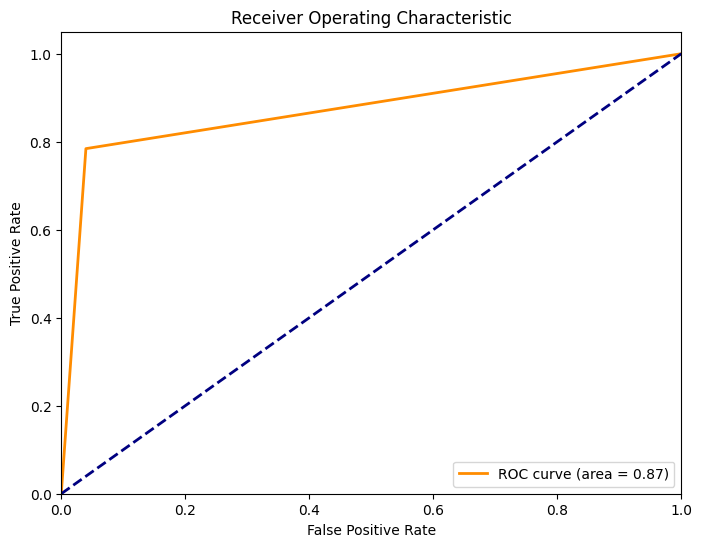

In [10]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()